# Automating the creation of a Wardley Map

## Improvements

- Need to re-scale
- Need to be able to modify y-axis

## Original Map (created in draw.io)

The map below took along time to create...it's not actually a map yet - it's just a value chain. I'm totally curious to try out the automated generation of Wardley Maps that Dinis has created so let's see how that goes.

<img width="800" alt="Capture" src="https://user-images.githubusercontent.com/50445147/59312494-36e54b80-8ca5-11e9-9574-565df824a40f.PNG">




In [9]:
%%javascript
$('.container').width('95%')

<IPython.core.display.Javascript object>

In [30]:
from IPython.display        import display_html, HTML, Javascript,display
from osbot_aws.apis.Lambda import Lambda
def maps_create(code):
    aws_lambda = Lambda('osbot_browser.lambdas.lambda_browser')
    params = ["maps", "exec_js"]
    params.extend(code.split(' '))

    payload = {"params": params,
               'data': {}}
    png_data = aws_lambda.invoke(payload)
    show_png(png_data)

#maps_create(map)
def show_png(png_data,height=200):
    html = '<img style="width:200%;height:1000px;border:1px solid black" align="left" src="data:image/png;base64,{1}"/>'.format(height,png_data)
    display_html(html, raw=True)


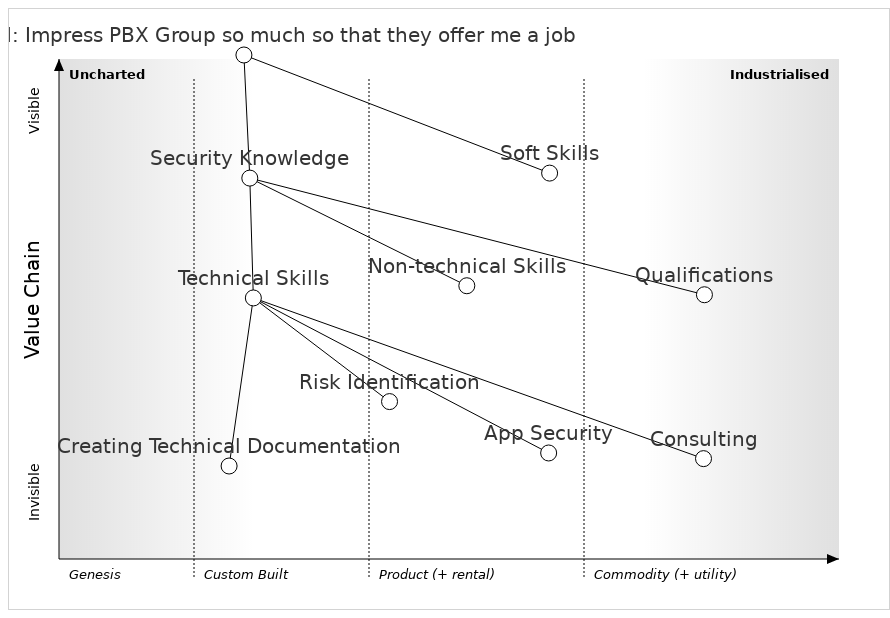

In [31]:
map_code = """
add("User need: Impress PBX Group so much so that they offer me a job", 1, 0.1)

add("Security Knowledge", 1, 2)
add("Soft Skills", 3, 2)

add("Technical Skills", 1, 4)
add("Non-technical Skills", 2.5, 4)
add("Qualifications", 4, 4)

add("Creating Technical Documentation", 1, 7)
add("Risk Identification", 2, 6)
add("App Security", 3, 7)
add("Consulting", 4, 7)

link("User need: Impress PBX Group so much so that they offer me a job", "Security Knowledge")
link("User need: Impress PBX Group so much so that they offer me a job", "Soft Skills")
link("Security Knowledge", "Qualifications")
link("Security Knowledge","Non-technical Skills")
link("Security Knowledge","Technical Skills")
link("Technical Skills","Creating Technical Documentation")
link("Technical Skills","App Security")
link("Technical Skills","Risk Identification")
link("Technical Skills","Consulting")

link("knows spell encantation","formal education")
link("knows spell encantation","word of mouth spell")
link("knows spell encantation","dark magic")
"""

maps_create(map_code)